
# Technical Assessment for AIAP Apprenticeship

### Exploratory Data Analysis
The goal of exploratory data analysis is to  understand the data that is given and be comfortable with what each column means before we build any models.

We are provided <https://aisgaiap.blob.core.windows.net/aiap4-assessment/real_estate.csv> as our dataset. This example is an exploratory analysis of the different factors that may affect housing prices in Sindian Dist., New
Taipei City, Taiwan. In order to display our dataset using the libraries imported, we need to read the csv file into a [Pandas](https://pandas.pydata.org/) dataframe `data`. 

In [2]:
import pandas as pd
import requests 
import io
content = requests.get('https://aisgaiap.blob.core.windows.net/aiap4-assessment/real_estate.csv').content
data = pd.read_csv(io.StringIO(content.decode('utf-8')), index_col=0)

A call to `data.info()` and `data.head()` helps us understand that we are dealing with a dataset that contains a mixture of continuous data (X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X5 latitude & X6 longitude) and also discrete data (X4 number of convenience stores), excluding the first column which serves as the index column.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


`data.info()` shows us that there are a total of 8 columns consisting of two value types, float and int. There are also a total of 414 rows and fortunately, all the columns of each row have non-null values. If there was to be a null value for a cell in the house age column for example, we may have to find ways to approximate that value to replace that null value or have to drop the row totally before we build a model to prevent from leading to a wrong prediction of housing prices.

To get a glimpse of what the values of each row of the dataset look like, we can use `data.head()` to print out the first 5 rows.

In [4]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


We can explore statistics about this dataset by using another function called `data.describe()`. This function shows that the mean house price is ~379801 New Taiwan Dollar/Ping. Among others, we can also see that the minimum and maximum price are about ~76000 and ~1175000 New Taiwan Dollar/Ping respectively.

In [5]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Visualisation Libraries
In order to explore the provided historical dataset of real estate valuation, we utilise [Seaborn](https://seaborn.pydata.org/), a data visualisation library based on [Matplotlib](https://matplotlib.org/). Our objective is to see whether we can reach any form of hypothesis that would help us understand how the different factors affect the price of each house.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Explore the distribution of house prices
Let's start with a basic histogram plot of house prices to view the distribution of house prices. This allows us to see what the majority of houses are priced at, which is in between 300000 and 500000 New Taiwan Dollar/Ping.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


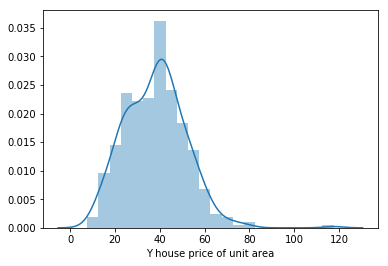

In [7]:
sns.distplot(data['Y house price of unit area'])

### Housing prices could be affected by location
Time and time again, people repeat that 'Location is king' when it comes to real estate. Since we can see that there are two columns in the dataset, latitude and longitude, let's first see whether or not we can tell anything from mapping out the data points on a scatter plot to envision plotting them on a geographical map. 

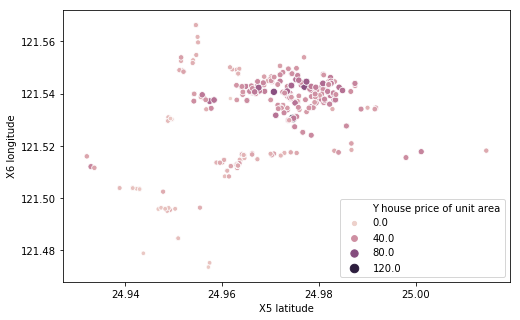

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='X5 latitude', y='X6 longitude', hue='Y house price of unit area', size='Y house price of unit area', data=data)

We can tell that most of the houses with house price of ~400000 New Taiwan Dollar/Ping and above are located in a cluster. Looking at Google maps of that cluster can also tell us that it is situated around key places such as a hospital, schools, sports parks, etc. 

![Xindian Dense Cluster](https://i.imgur.com/HWEcqKx.png)

### Finding correlation between variables
Since earlier on, we mentioned that we are working with integers and floats and not working with any strings, we are able to plot a heatmap to visualise the correlation between variables in the dataset. The values of the correlations will range from -1 to +1.  

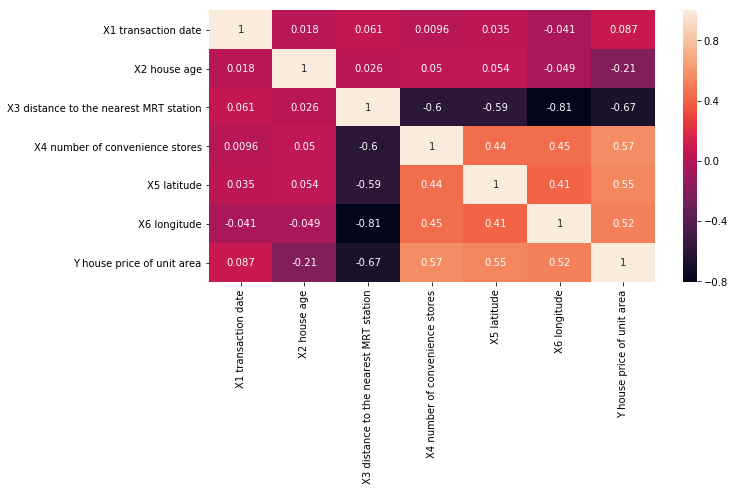

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

### House price vs transaction date
Referencing `Y house price of unit area` row on the y-axis, we can see that it has a correlation value of 0.087 with `X1 transaction date`, which means that the year which the house is being sold does not affect the price of the house. 

We can confirm this by plotting and visualising another plot.

<Figure size 720x360 with 0 Axes>

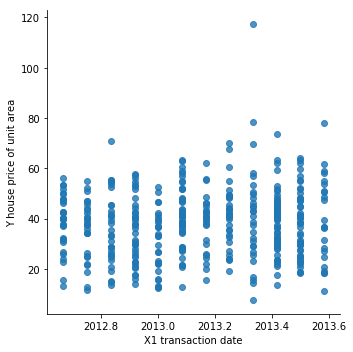

In [10]:
plt.figure(figsize=(10,5))
sns.lmplot(x='X1 transaction date', y='Y house price of unit area', data=data, fit_reg=False)

There isn't a clear relationship between these two values. Aside from extreme outliers such as the house with the max price of ~1175000 New Taiwan Dollar/Ping in 2013, every single date column shows that the house prices ranges from ~200000 to ~600000 New Taiwan Dollar/Ping.

### House price vs distance to nearest MRT station
Without taking into account the positive or negative signs, we can see that the largest number in that row is -0.67 which describes the relationship of `Y house price of unit area` and `X3 distance to the nearest MRT station`. This means that both values are negatively correlated. This means that as the distance to the nearest MRT station decreases, the house price increases.

We can confirm this by plotting and visualising another scatter plot.

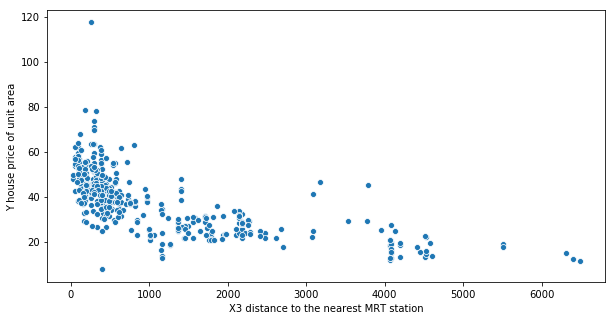

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=data)

### Confirmation that "Location is king"
We can see that `Y house price of unit area` has a positive correlation with `X5 latitude` and `X6 latitude`.

### House price vs number of convenience stores
Plotting a barplot of `Y house price of unit area` against `X4 number of convenience stores` also show us a general increase in price as the number of convenience stores increases. This is not surprising as people would rather stay at a place where it's closely located near stores as it avoids them having to waste time and money travelling to purchase necessities.

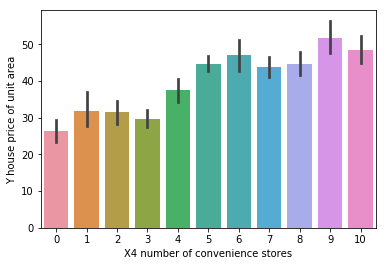

In [12]:
sns.barplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data)

### House price vs house age
Plotting a barplot of `Y house price of unit area` against `X2 house age` shows us that, aside from the outlier, which is the most expensive house in this dataset, generally, there doesn't seem to be a relationship between the age of the house and the price because they seem to cluster in the same region despite of house age. A basic search on Google shows that unlike countries like Singapore and Hong Kong, which has a certain amount of lease when it comes to housing, Taiwan doesn't have a similar concept. Therefore, this could be a reason why house age doesn't really affect the housing prices in Taiwan.

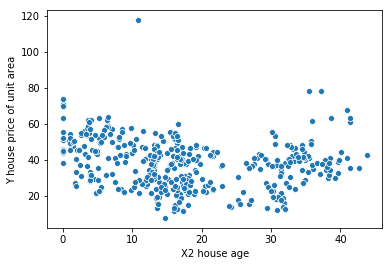

In [13]:
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=data)

### Conclusion

Through our exploratory data analysis, we made sure that our data is as clean as possible, without null values and friendly enough for us to visualise. With our initial analysis, it will aid us in forming valuable insights with our data using models. 